# User params

In [17]:
max_samples = 1_000

In [18]:

import os, sys
sys.path.append(os.path.abspath('../src'))
from src.config import BASE_PATH_DATA, PATH_PROJECT
os.chdir(PATH_PROJECT)

import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)

# Loading data

In [63]:
import numpy as np
from src.utils.io.io import load_dataframe
from src.config import BASE_PATH_DATA

# load data
file_path_test_enriched = os.path.join(BASE_PATH_DATA, 'processed', f'df_test_enriched.parquet')
test_df_enriched = load_dataframe(file_path_test_enriched)
test_df_enriched = test_df_enriched.reset_index(drop=True)  # lets reset the index

file_path_train_encoded = os.path.join(BASE_PATH_DATA, 'processed', f'df_train_encoded.parquet')
file_path_test_encoded = os.path.join(BASE_PATH_DATA, 'processed', f'df_test_encoded.parquet')
train_df_encoded = load_dataframe(file_path_train_encoded)
test_df_encoded = load_dataframe(file_path_test_encoded)



2024-08-06 13:25:57,967 - src.config - DEBUG - calling load_dataframe
2024-08-06 13:25:57,968 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers
2024-08-06 13:25:57,996 - src.config - DEBUG - calling load_dataframe
2024-08-06 13:25:57,997 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers
2024-08-06 13:25:58,015 - src.config - DEBUG - calling load_dataframe
2024-08-06 13:25:58,016 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers


# Clustering

In [91]:
import pandas as pd
import numpy as np
import hdbscan
import plotly.express as px

# Apply HDBSCAN
X = test_df_encoded.values
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
cluster_labels = clusterer.fit_predict(X)

# Create a DataFrame for easier plotting
df_hdbscan = pd.DataFrame(X, columns=test_df_encoded.columns)
df_hdbscan['Cluster'] = cluster_labels
df_hdbscan['Outlier'] = cluster_labels == -1

# Include relevant columns from test_df_enriched
df_hdbscan['rating'] = test_df_enriched['rating']
df_hdbscan['text_review'] = test_df_enriched['text_review']
df_hdbscan['price'] = test_df_enriched['price']
df_hdbscan['sentiment_score'] = test_df_enriched['sentiment_score']

# Create an interactive plot using Plotly
fig = px.scatter(
    df_hdbscan, 
    x='rating', 
    y='sentiment_score', 
    color='Cluster',
    symbol='Outlier',
    title='HDBSCAN Clustering and Outlier Detection',
    labels={'rating': 'rating', 'sentiment_score': 'sentiment_score'},
    template='plotly_dark',
    hover_data=['rating', 'text_review', 'price', 'sentiment_score']
)

# Customize the plot to highlight outliers
fig.update_traces(marker=dict(size=6, opacity=0.8), selector=dict(mode='markers'))
fig.update_traces(marker=dict(size=8, opacity=1, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(marker_symbol='x'))

# Show the plot
fig.show()


# T-sne vizualization

In [68]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px

# Apply t-SNE
X = test_df_encoded
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for easier plotting
df_tsne = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['rating'] = test_df_enriched['rating']
df_tsne['text_review'] = test_df_enriched['text_review']
df_tsne['price'] = test_df_enriched['price']
df_tsne['sentiment_score'] = test_df_enriched['sentiment_score']

# Create an interactive plot using Plotly
fig = px.scatter(
    df_tsne, 
    x='Component 1', 
    y='Component 2', 
    color='rating',
    title='t-SNE Visualization of the Dataset',
    labels={'Component 1': 'Component 1', 'Component 2': 'Component 2'},
    template='plotly_dark',
    hover_data=['rating', 'text_review', 'price', "sentiment_score"]
)

# Show the plot
fig.show()


# Outlier detection with PyOD


In [19]:
import numpy as np
from src.tasks.outliers import outlier_prediction

# train and inference
outliers_train, scores_train = outlier_prediction(train_df_encoded, training=True)
outliers_test, scores_test = outlier_prediction(test_df_encoded, training=False) 

# categorize samples
train_scores_inliers = scores_train[outliers_train==0]
train_scores_outliers = scores_train[outliers_train==1]

test_scores_inliers = scores_test[outliers_test==0]
test_scores_outliers = scores_test[outliers_test==1]

# Calculate average outlier scores for train and test sets
average_score_inlier_train = np.mean(train_scores_inliers)
average_score_outlier_train = np.mean(train_scores_outliers)

average_score_inlier_test = np.mean(test_scores_inliers)
average_score_outlier_test = np.mean(test_scores_outliers)


2024-08-06 09:43:36,532 - src.config - DEBUG - calling load_dataframe
2024-08-06 09:43:36,533 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers
2024-08-06 09:43:36,564 - src.config - DEBUG - calling load_dataframe
2024-08-06 09:43:36,564 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers
2024-08-06 09:43:36,582 - src.config - DEBUG - calling load_dataframe
2024-08-06 09:43:36,583 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers
2024-08-06 09:43:36,598 - src.config - DEBUG - calling outlier_prediction
c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(
2024-08-06 09:43:36,874 - src.config - DEBUG - calling outlier_prediction
c:\Users\alexi\AppData\Loc

# Visualizations

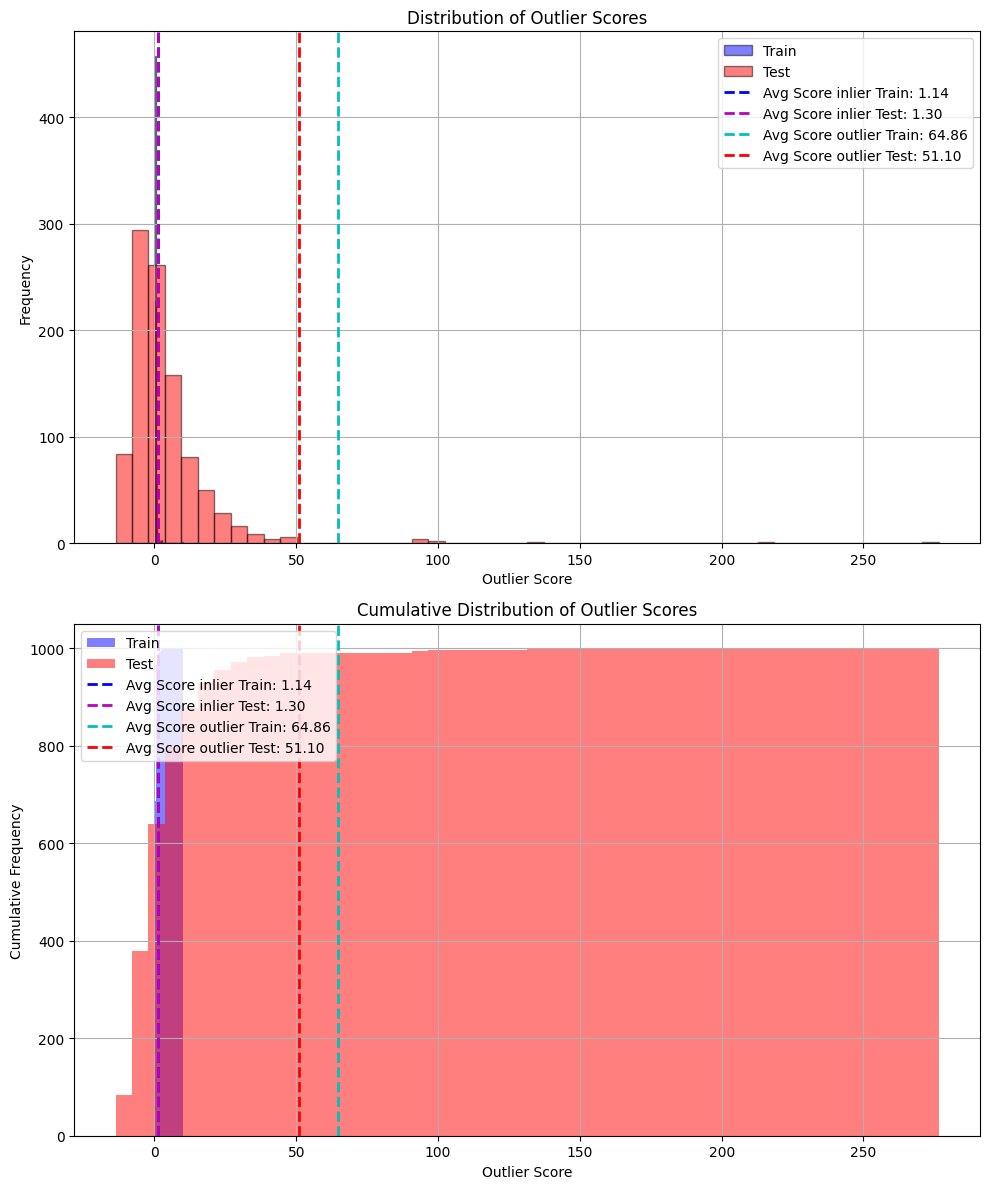

In [71]:
import matplotlib.pyplot as plt

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting the histogram of outlier scores for train and test sets
ax1.hist(scores_train, bins=50, alpha=0.5, color='blue', edgecolor='black', label='Train')
ax1.hist(scores_test, bins=50, alpha=0.5, color='red', edgecolor='black', label='Test')

ax1.axvline(average_score_inlier_train, color='b', linestyle='dashed', linewidth=2, label=f'Avg Score inlier Train: {average_score_inlier_train:.2f}')
ax1.axvline(average_score_inlier_test, color='m', linestyle='dashed', linewidth=2, label=f'Avg Score inlier Test: {average_score_inlier_test:.2f}')
ax1.axvline(average_score_outlier_train, color='c', linestyle='dashed', linewidth=2, label=f'Avg Score outlier Train: {average_score_outlier_train:.2f}')
ax1.axvline(average_score_outlier_test, color='r', linestyle='dashed', linewidth=2, label=f'Avg Score outlier Test: {average_score_outlier_test:.2f}')

ax1.set_title('Distribution of Outlier Scores')
ax1.set_xlabel('Outlier Score')
ax1.set_ylabel('Frequency')
ax1.legend(loc='upper right')
ax1.grid(True)

# Plotting the cumulative histogram of outlier scores for train and test sets
ax2.hist(scores_train, bins=50, alpha=0.5, color='blue', edgecolor=None, label='Train', cumulative=True)
ax2.hist(scores_test, bins=50, alpha=0.5, color='red', edgecolor=None, label='Test', cumulative=True)

ax2.axvline(average_score_inlier_train, color='b',  linestyle='dashed', linewidth=2, label=f'Avg Score inlier Train: {average_score_inlier_train:.2f}')
ax2.axvline(average_score_inlier_test, color='m',  linestyle='dashed', linewidth=2, label=f'Avg Score inlier Test: {average_score_inlier_test:.2f}')
ax2.axvline(average_score_outlier_train, color='c', linestyle='dashed', linewidth=2, label=f'Avg Score outlier Train: {average_score_outlier_train:.2f}')
ax2.axvline(average_score_outlier_test, color='r',  linestyle='dashed', linewidth=2, label=f'Avg Score outlier Test: {average_score_outlier_test:.2f}')

ax2.set_title('Cumulative Distribution of Outlier Scores')
ax2.set_xlabel('Outlier Score')
ax2.set_ylabel('Cumulative Frequency')
ax2.legend(loc='upper left')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


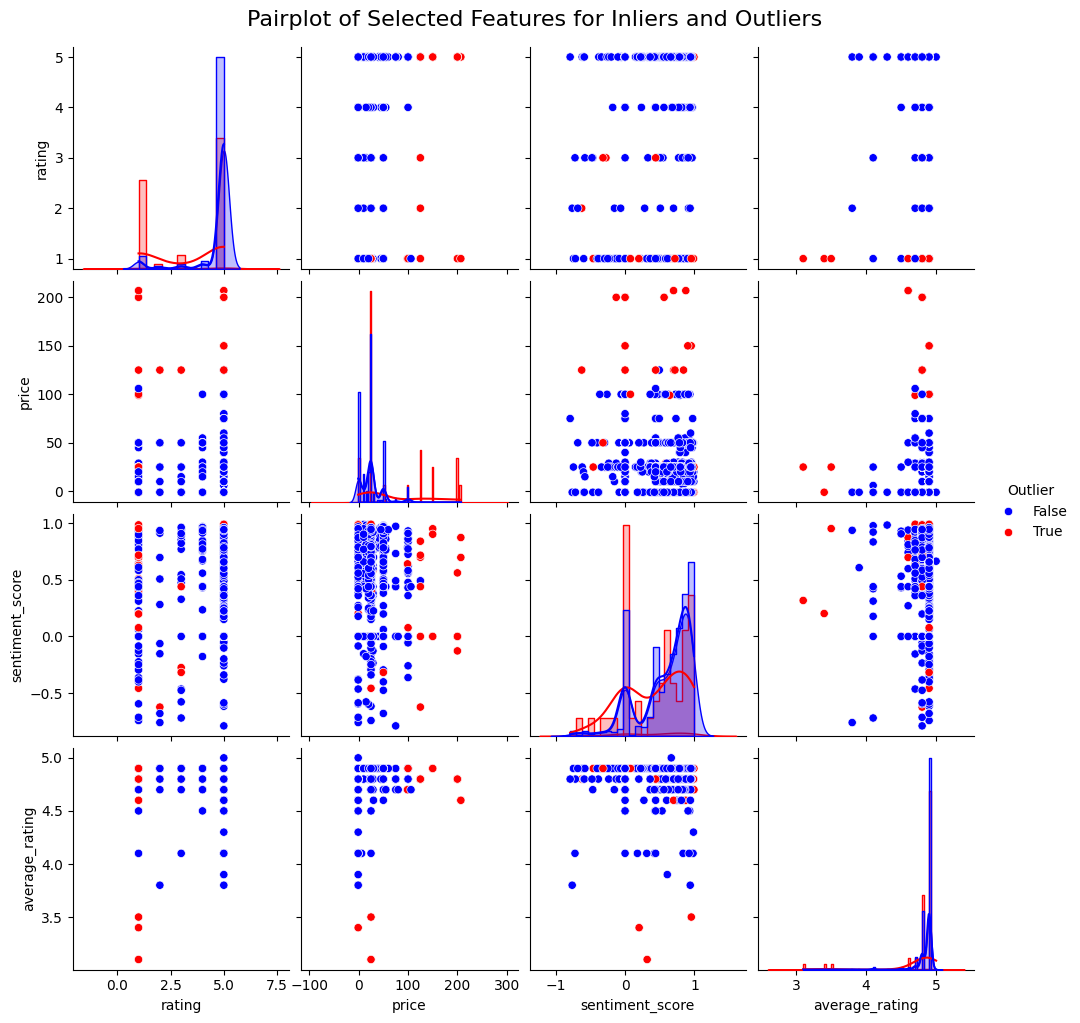

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for easier plotting
df_visu = pd.DataFrame()
df_visu['scores_test'] = scores_test
df_visu['Outlier'] = outliers_test

# Include relevant columns from test_df_enriched
cols_of_interest = ['rating', 'price', 'sentiment_score', 'average_rating']
for col in cols_of_interest:
    df_visu[col] = test_df_enriched[col].reset_index(drop=True)

# Plot the pairplot to visualize feature distributions and pairwise relationships
g = sns.pairplot(df_visu, hue='Outlier', diag_kind='kde', palette={False: 'blue', True: 'red'}, vars=cols_of_interest)

# Map the diagonal to use histplot with kde and density normalization
g.map_diag(sns.histplot, kde=True, element='step', stat='density', common_norm=False)

# Set titles and adjust layout
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
    ax.set_title(ax.get_title(), fontsize=12)

# Adjust the title of the entire plot
plt.suptitle('Pairplot of Selected Features for Inliers and Outliers', y=1.02, fontsize=16)

# Show the plot
plt.show()


In [21]:
from src.tasks.distribution_shift import distribution_shift_scoring
ks_score_train = distribution_shift_scoring(scores_train, train_scores_outliers, method='ks')
ks_score_test = distribution_shift_scoring(scores_train, test_scores_outliers, method='ks')

psi_score_train = distribution_shift_scoring(scores_train, train_scores_outliers, method='psi')
psi_score_test = distribution_shift_scoring(scores_train, test_scores_outliers, method='psi')

print(f'KS Score - Train: {ks_score_train:.2f}, Test: {ks_score_test:.2f}, (higher is more different)')
print(f'PSI Score - Train: {psi_score_train:.2f}, Test: {psi_score_test:.2f}, (higher is more different)')

2024-08-06 09:43:37,615 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-06 09:43:37,618 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-06 09:43:37,621 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-06 09:43:37,622 - src.config - DEBUG - calling distribution_shift_scoring


KS Score - Train: 0.97, Test: 0.97, (higher is more different)
PSI Score - Train: 7.09, Test: 0.94, (higher is more different)


# Exploring outliers

In [36]:
# add the score to the dataframe and sort it
test_df_enriched["scores"] = scores_test
test_df_sorted = test_df_enriched.sort_values(by='scores', ascending=False)

col_to_display = [
    "rating",
    "average_rating",
    "sentiment_score",
    "similarity_good",
    "similarity_bad",
    "similarity_expensive",
    "similarity_scam",
    "similarity_error",
    "text_review",
    "text_metadata",
    "hour",
    "helpful_vote",
    "price",
    "length_char",
    "interaction_score",
    "readability",
    ]

# show top rows
display(test_df_sorted[col_to_display].head(5))
print(test_df_sorted[col_to_display].head(5))


,rating,average_rating,sentiment_score,similarity_good,similarity_bad,similarity_expensive,similarity_scam,similarity_error,text_review,text_metadata,hour,helpful_vote,price,length_char,interaction_score,readability
3433,1,3.4,0.2026,0.110251,0.170367,0.090186,0.238859,0.350568,"Hugely Disappointing Gift/n/nHugely disappointing gift.<br /><br />I'm not a big fan of gift cards in general, but I have received Amazon cards in the past. Amazon has a huge selection of items t...",Staples Holiday Gift Card $25/n/n/n/n,22,0,-1.00,3207,0.665174,0.5991
1147,1,4.8,0.5837,0.113505,0.183616,0.106053,0.288690,0.346771,"Terrible/n/nI tried to use the card to purchase something on Amazon and it didn't work Also, if you use it somewhere else the card has to be activated before you use it! It appears that you won't...",Visa $25 Gift Card (plus $3.95 Purchase Fee)/n/n/n/n,4,152,28.95,279,0.438307,0.7859
14756,1,4.6,0.6988,0.070332,0.101796,0.200176,0.267648,0.077780,"Limited use./n/nIt may have been an oversight on my part, but this card is NOT universally accepted. For online purchases (where my intention of using it originated) It was rejected a couple of ti...",$200 Mastercard Gift Card (plus $6.95 Purchase Fee)/n/n/n/n,11,44,206.95,535,0.664616,0.8193
18566,1,4.8,-0.1280,0.138065,0.201071,0.137780,0.295046,0.271063,"One Star/n/narrived with a $0.00 balance, no refund by amazon",JCPenney Gift Card/n/n/n/n,1,1,200.00,61,0.251060,0.7486
16808,5,4.6,0.8750,0.273418,0.205082,0.283000,0.269687,0.160399,The best for these times/n/nConvenient. Quick. In these times it is a good long distance gift.,$200 Mastercard Gift Card (plus $6.95 Purchase Fee)/n/n/n/n,16,0,206.95,94,0.383441,0.9720


       rating  average_rating  sentiment_score  similarity_good  similarity_bad  similarity_expensive  similarity_scam  similarity_error                                                                                                                                                                                              text_review                                                text_metadata  hour  helpful_vote   price  length_char  interaction_score  readability
3433        1             3.4           0.2026         0.110251        0.170367              0.090186         0.238859          0.350568  Hugely Disappointing Gift/n/nHugely disappointing gift.<br /><br />I'm not a big fan of gift cards in general, but I have received Amazon cards in the past.  Amazon has a huge selection of items t...                        Staples Holiday Gift Card $25/n/n/n/n    22             0   -1.00         3207           0.665174       0.5991
1147        1             4.8           0.5837         0

In [ ]:
import qgrid
widget = qgrid.show_grid(test_df_sorted[col_to_display])
widget

In [46]:
# top rows with discrepency in sentiment analysis and rating
df_too_high_rating = test_df_sorted[(test_df_sorted["rating"] >= 4) & (test_df_sorted["sentiment_score"] < 0.5)]
display(df_too_high_rating[col_to_display].head(20))

,rating,average_rating,sentiment_score,similarity_good,similarity_bad,similarity_expensive,similarity_scam,similarity_error,text_review,text_metadata,hour,helpful_vote,price,length_char,interaction_score,readability
12047,5,4.8,0.0000,0.181690,0.250507,0.274545,0.342439,0.152507,Five Stars/n/nWorth the price,JCPenney Gift Card/n/n/n/n,16,0,200.0,29,0.320807,1.1818
17002,5,4.8,0.0000,0.161135,0.165927,0.134747,0.258112,0.125208,Five Stars/n/nGreat deal,JCPenney Gift Card/n/n/n/n,8,0,200.0,24,0.268259,1.1919
12964,5,4.8,0.0000,0.202606,0.182167,0.118330,0.260086,0.146014,Five Stars/n/nGreat deal!,JCPenney Gift Card/n/n/n/n,16,0,200.0,25,0.274439,1.1919
12973,5,4.8,0.0000,0.142470,0.166011,0.010466,0.093891,0.031031,Fer/n/nExcelente!,Kohl's Gift Card/n/n/n/n,18,0,125.0,17,0.065869,-1.3259
6879,5,4.9,0.0000,0.170709,0.199800,0.073928,0.183070,0.092794,Five Stars/n/nNice,Southwest Airlines Gift Card/n/n/n/n,12,0,150.0,18,0.198004,1.2021
7558,5,4.9,0.0000,0.223837,0.236459,0.165697,0.340745,0.178944,Five Stars/n/ngreat buy,Southwest Airlines Gift Card/n/n/n/n,12,0,150.0,23,0.294108,1.1919
6867,5,4.9,0.0000,0.220020,0.171175,0.105094,0.104645,0.107030,Presentation/n/nLovely presentation,Amazon.com Gift Card in a Holiday Gift Box (Various Designs)/n/n/n/n,8,0,25.0,35,0.209423,-1.7590
19088,5,4.9,0.0000,0.334212,0.426896,0.112843,0.134687,0.257143,Quality product/n/nQuality product,Amazon.com Gift Card in a Holiday Gift Box (Various Designs)/n/n/n/n,18,0,25.0,34,0.169381,-0.5002
18597,5,4.9,0.0000,0.237890,0.103041,0.132116,0.065189,0.048804,Amazing/n/nAmazing,Amazon.com Gift Card in Various Gift Boxes/n/n/n/n,2,0,25.0,18,0.037315,-2.1719
6138,5,4.9,0.0000,0.342278,0.381642,0.036755,0.362679,0.418296,Works as advertised./n/nI got what I ordered. The product was as described on the web site. It arrived in a timely manner. Works as advertised.,Amazon.com Gift Card in Various Gift Boxes/n/n/n/n,22,0,25.0,143,0.090575,0.8332


In [47]:
df_too_low_rating = test_df_sorted[(test_df_sorted["rating"] < 3) & (test_df_sorted["sentiment_score"] > 0.5)]
display(df_too_low_rating[col_to_display].head(5))

,rating,average_rating,sentiment_score,similarity_good,similarity_bad,similarity_expensive,similarity_scam,similarity_error,text_review,text_metadata,hour,helpful_vote,price,length_char,interaction_score,readability
1147,1,4.8,0.5837,0.113505,0.183616,0.106053,0.288690,0.346771,"Terrible/n/nI tried to use the card to purchase something on Amazon and it didn't work Also, if you use it somewhere else the card has to be activated before you use it! It appears that you won't...",Visa $25 Gift Card (plus $3.95 Purchase Fee)/n/n/n/n,4,152,28.95,279,0.438307,0.7859
14756,1,4.6,0.6988,0.070332,0.101796,0.200176,0.267648,0.077780,"Limited use./n/nIt may have been an oversight on my part, but this card is NOT universally accepted. For online purchases (where my intention of using it originated) It was rejected a couple of ti...",$200 Mastercard Gift Card (plus $6.95 Purchase Fee)/n/n/n/n,11,44,206.95,535,0.664616,0.8193
20442,1,3.5,0.9542,0.137594,0.165611,0.059950,0.222202,0.307266,"Deceiving/n/nThere should never be fine print that you have to read when buying a gift card. This came hand-taped onto the the cardboard display, so since it looked fishy, I went online to read re...",Taco Time Gift Card/n/n/n/n,2,0,25.00,787,0.596247,0.8958
31,1,4.8,0.7184,0.124143,0.147500,0.142213,0.248157,0.343595,Gift Card Empty/n/nI purchased this $100.00 gift card on December 14 2019 and yesterday April 26 2010 My wife scratched the pin and she was unable to used it the card is empty we called Kohls and ...,Kohl's Gift Card/n/n/n/n,21,0,125.00,326,0.642018,0.6590
18487,1,4.8,0.9870,0.094591,0.033352,0.088345,0.129007,0.148938,"They want our money, but.../n/nI purchased several gift cards last year, with greeting cards that had messages suitable to various recipients. Many of my family members are Christians, who apprec...",Amazon.com Gift Card in a Greeting Card (Various Designs)/n/n/n/n,4,9,-1.00,1061,0.476276,0.6390
